In [0]:
# Large CNN model for the CIFAR-10 Dataset 
import numpy 
from keras.datasets import cifar10 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.constraints import maxnorm 
from keras.optimizers import SGD 
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.utils import np_utils 
from keras import backend as K 
K.set_image_dim_ordering('th') 
import matplotlib.pyplot as plt

In [0]:
# fix random seed for reproducibility 
seed = 7 
numpy.random.seed(seed) 

In [0]:
# load data 
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
# normalize inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [0]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1] 

In [0]:
# Create the model 
model = Sequential() 
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='sigmoid', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='sigmoid', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='sigmoid', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='sigmoid', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='sigmoid', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='sigmoid', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='sigmoid', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='sigmoid', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax')) 

In [0]:
# Compile model e
epochs = 25 
lrate = 0.01

In [7]:
decay = lrate/epochs 
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 
print(model.summary()) 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 16, 16)        36928     
__________

In [10]:
# Fit the model 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 38s 769us/step - loss: 0.4091 - acc: 0.8541 - val_loss: 0.6295 - val_acc: 0.7885
Epoch 2/25
50000/50000 [==============================] - 39s 771us/step - loss: 0.3951 - acc: 0.8582 - val_loss: 0.6202 - val_acc: 0.7901
Epoch 3/25
50000/50000 [==============================] - 39s 771us/step - loss: 0.3842 - acc: 0.8634 - val_loss: 0.6319 - val_acc: 0.7906
Epoch 4/25
50000/50000 [==============================] - 39s 778us/step - loss: 0.3761 - acc: 0.8648 - val_loss: 0.6274 - val_acc: 0.7914
Epoch 5/25
50000/50000 [==============================] - 37s 732us/step - loss: 0.3668 - acc: 0.8689 - val_loss: 0.6273 - val_acc: 0.7968
Epoch 6/25
50000/50000 [==============================] - 39s 772us/step - loss: 0.3572 - acc: 0.8725 - val_loss: 0.6239 - val_acc: 0.7935
Epoch 7/25
50000/50000 [==============================] - 39s 776us/step - loss: 0.3441 - acc: 0.8765 - val_loss: 0.

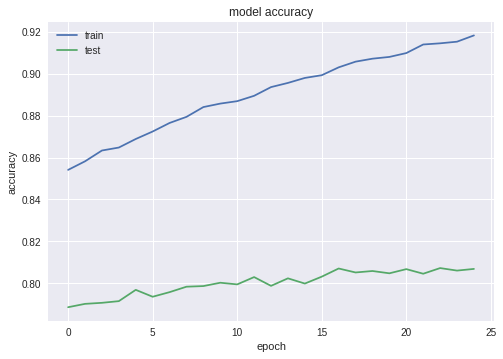

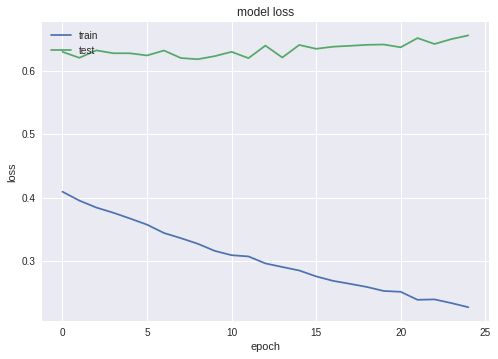

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()